# We'll Deal with this Specific Campus Placement Dataset in following Manner:

# 1)Data Visualization, Dealing with various relations within features and extracting a Useful        information, in a pretty decent Manner. 

# 2)Preprocessing the data, Handling the missing values(NaN Values), converting Categorical features.

# 3)Predicting the status(Placed or not), Considering all features, using DecisionTreeClassifier, RandomForestClassifier and XGBoost Classifier respectively.


In [7]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [10]:
df['salary']=df['salary'].fillna(df['salary'].mode()[0])
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64

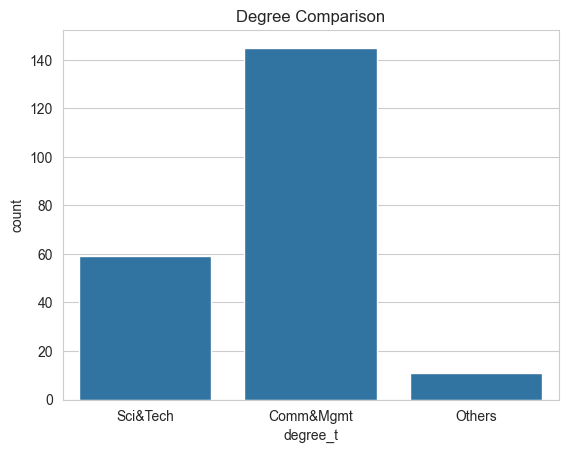

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'degree_t', data = df)
plt.title('Degree Comparison')
df['degree_t'].value_counts()

Text(0.5, 1.0, 'No of students placed amongst gender')

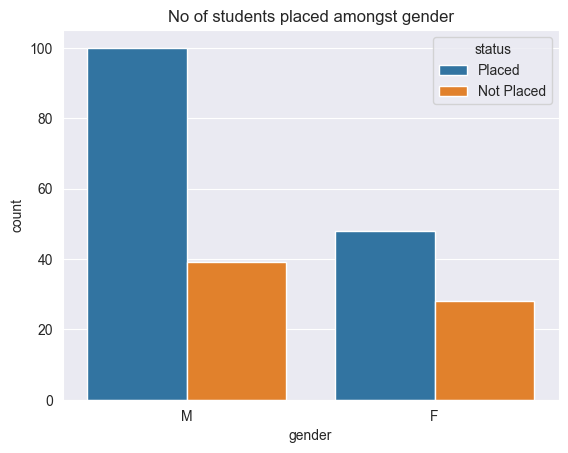

In [12]:
sns.set_style('darkgrid')
sns.countplot(x = 'gender', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

Text(0.5, 1.0, 'No of students placed amongst gender')

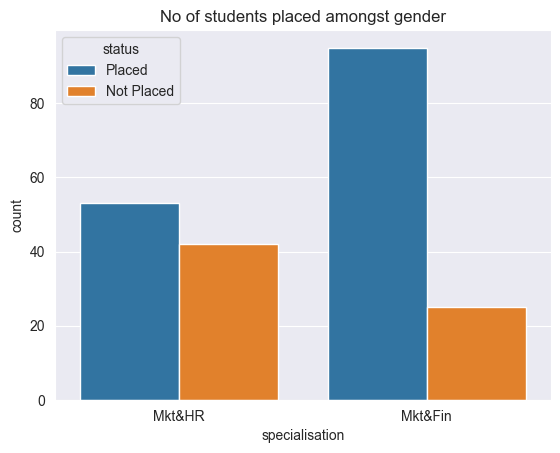

In [13]:
sns.set_style('darkgrid')
sns.countplot(x = 'specialisation', hue = 'status', data = df)
plt.title('No of students placed amongst gender')

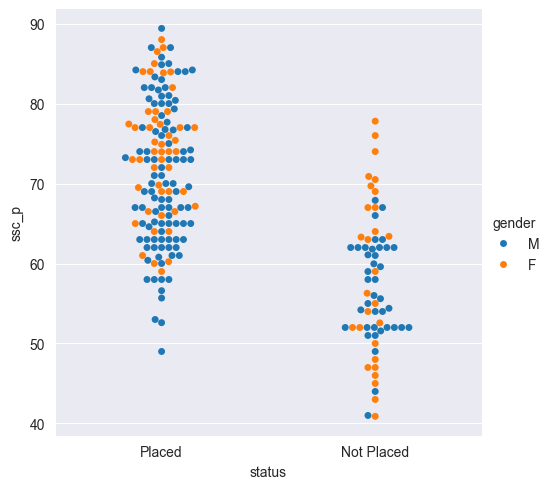

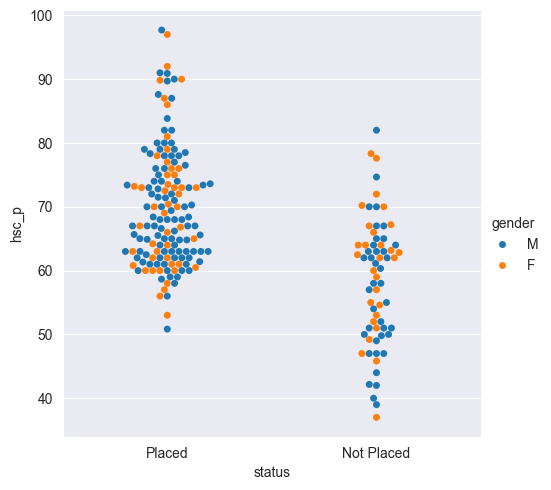

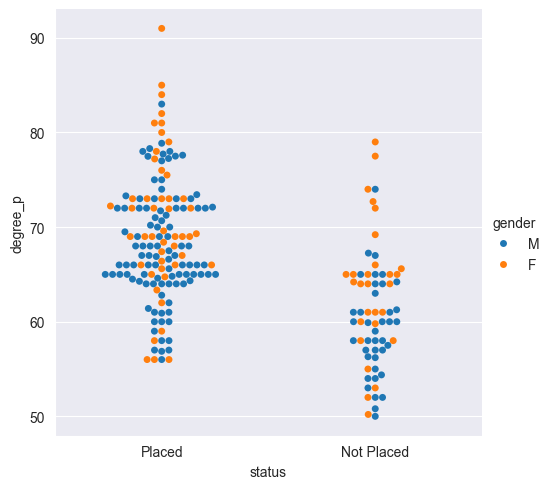

In [14]:
sns.catplot(x="status", y="ssc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="hsc_p", data=df,kind="swarm",hue='gender')
sns.catplot(x="status", y="degree_p", data=df,kind="swarm",hue='gender')

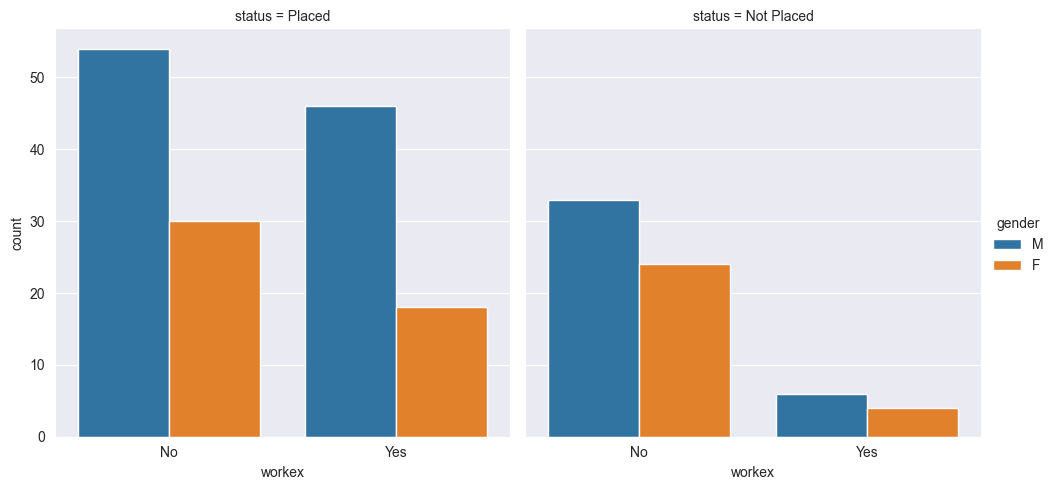

In [15]:
sns.catplot(x="workex", kind="count",hue ='gender', data=df, col='status');

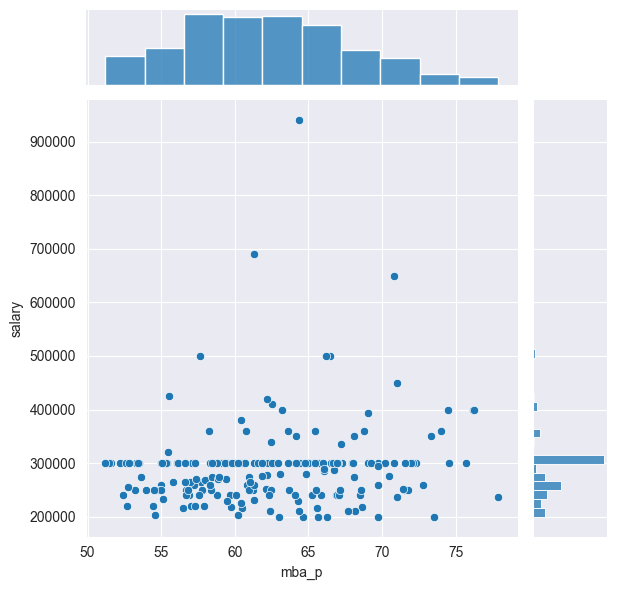

In [16]:
sns.jointplot(x=df['mba_p'], y=df['salary']);

In [18]:
df['gender'].replace(to_replace='M', value=1, inplace=True)
df['gender'].replace(to_replace='F', value=0, inplace=True)

df['ssc_b'].replace(to_replace='Central', value=1, inplace=True)
df['ssc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_b'].replace(to_replace='Central', value=1, inplace=True)
df['hsc_b'].replace(to_replace='Others', value=0, inplace=True)

df['hsc_s'].replace(to_replace='Science', value=1, inplace=True)
df['hsc_s'].replace(to_replace='Commerce', value=2, inplace=True)
df['hsc_s'].replace(to_replace='Arts', value=3, inplace=True)

df['workex'].replace(to_replace='Yes', value=1, inplace=True)
df['workex'].replace(to_replace='No', value=0, inplace=True)

df['specialisation'].replace(to_replace='Mkt&Fin', value=1, inplace=True)
df['specialisation'].replace(to_replace='Mkt&HR', value=0, inplace=True)

In [19]:
df.degree_t.unique()

array(['Sci&Tech', 'Comm&Mgmt', 'Others'], dtype=object)

In [20]:
df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
df['degree_t'].replace(to_replace='Comm&Mgmt', value=2, inplace=True)
df['degree_t'].replace(to_replace='Others', value=2, inplace=True)

df['status'].replace(to_replace='Placed', value=1, inplace=True)
df['status'].replace(to_replace='Not Placed', value=0, inplace=True)

df.drop(['sl_no'],axis=1,inplace=True)
df.drop(['salary'],axis=1,inplace=True)

C:\Users\91829\AppData\Local\Temp\ipykernel_18508\2997064879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['degree_t'].replace(to_replace='Sci&Tech', value=1, inplace=True)
C:\Users\91829\AppData\Local\Temp\ipykernel_18508\2997064879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [21]:
df.head(10)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,0,91.00,0,2,58.00,1,0,55.00,0,58.80,1
1,1,79.33,1,78.33,0,1,77.48,1,1,86.50,1,66.28,1
2,1,65.00,1,68.00,1,3,64.00,2,0,75.00,1,57.80,1
3,1,56.00,1,52.00,1,1,52.00,1,0,66.00,0,59.43,0
4,1,85.80,1,73.60,1,2,73.30,2,0,96.80,1,55.50,1
5,1,55.00,0,49.80,0,1,67.25,1,1,55.00,1,51.58,0
6,0,46.00,0,49.20,0,2,79.00,2,0,74.28,1,53.29,0
7,1,82.00,1,64.00,1,1,66.00,1,1,67.00,1,62.14,1
8,1,73.00,1,79.00,1,2,72.00,2,0,91.34,1,61.29,1
9,1,58.00,1,70.00,1,2,61.00,2,0,54.00,1,52.21,0


In [22]:
df.dtypes

gender              int64
ssc_p             float64
ssc_b               int64
hsc_p             float64
hsc_b               int64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
dtype: object

In [23]:
X = df[['gender', 'ssc_p','ssc_b', 'hsc_p','hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = df['status']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
pred1=dt.predict(X_test)
accuracy_score(pred1,y_test)

0.6976744186046512

In [28]:
confusion_matrix(pred1,y_test)

array([[10,  5],
       [ 8, 20]])

Considering RandomforestClassifier:

In [29]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
pred2=rf.predict(X_test)
accuracy_score(pred2,y_test)

0.7441860465116279